Causal Analysis is a field within experimental statistics to prove and establish the cause and effect relationship. 
In statistics, using statistical algorithms to infer causality within the dataset under the strict assumption is called Exploratory causal analysis (ECA).

ECA, in turn, is a way to prove causation with more controllable experimentations and not only based on the correlation. 
We often need to prove the Counterfactual — A different condition under other circumstances. The problem is we only could approximate the Causal Effect and not the counterfactual.
Here i interoduce four different python libraries working on cousality.

1. Causalinference

Causalinference is a Python package that provides various statistical methods for causal analysis. It is a simple package that was used for basic causal analysis learning. 
The main features of these packages include:

- Propensity score estimation and subclassification
- Improvement of covariate balance through trimming
- Estimation of treatment effects
- Assessment of overlap in covariate distributions

pip install causalinference


Here is a small example:

In [1]:
from causalinference import CausalModel
from causalinference.utils import random_data
#Y is the outcome, D is treatment status, and X is the independent variable
Y, D, X = random_data()
causal = CausalModel(Y, D, X)

The CausalModel class would analyze the data. 
We would need to do a few more steps to acquire important information from the model. 
First, let’s get the statistical summary.

In [2]:
print(causal.summary_stats)


Summary Statistics

                      Controls (N_c=2557)        Treated (N_t=2443)             
       Variable         Mean         S.d.         Mean         S.d.     Raw-diff
--------------------------------------------------------------------------------
              Y       -0.999        1.738        5.073        2.981        6.072

                      Controls (N_c=2557)        Treated (N_t=2443)             
       Variable         Mean         S.d.         Mean         S.d.     Nor-diff
--------------------------------------------------------------------------------
             X0       -0.344        0.926        0.351        0.933        0.748
             X1       -0.327        0.936        0.328        0.954        0.693
             X2       -0.344        0.945        0.361        0.934        0.751



By using the summary_stats attribute, we would acquire all the basic information of the dataset.

The main part of causal analysis is acquiring the treatment effect information. The simplest one to do is by using the Ordinary Least Square method.

In [3]:
causal.est_via_ols()
print(causal.estimates)


Treatment Effect Estimates: OLS

                     Est.       S.e.          z      P>|z|      [95% Conf. int.]
--------------------------------------------------------------------------------
           ATE      2.951      0.035     84.878      0.000      2.883      3.019
           ATC      1.950      0.040     48.196      0.000      1.871      2.030
           ATT      3.998      0.040     99.451      0.000      3.920      4.077



/Users/sabazamankhani/miniforge3/lib/python3.9/site-packages/causalinference/estimators/ols.py:21: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  olscoef = np.linalg.lstsq(Z, Y)[0]


ATE, ATC, and ATT stand for Average Treatment Effect, Average Treatment Effect for Control and Average Treatment Effect for Treated, respectively. Using this information, we could assess whether the treatment has an effect compared to the control.

Using the propensity score method, we could also get information regarding the probability of treatment conditional on the independent variables.



In [4]:
causal.est_propensity_s()
print(causal.propensity)


Estimated Parameters of Propensity Score

                    Coef.       S.e.          z      P>|z|      [95% Conf. int.]
--------------------------------------------------------------------------------
     Intercept     -0.060      0.036     -1.669      0.095     -0.130      0.010
            X2      1.127      0.044     25.795      0.000      1.042      1.213
            X0      1.106      0.044     25.343      0.000      1.021      1.192
            X1      1.077      0.043     25.053      0.000      0.992      1.161



Using the propensity score method, we could assess the probability of the treatment given the independent variables.

2. Causallib

Causallib is a Python package for Causal Analysis developed by IBM. 
The package provides a causal analysis API unified with the Scikit-Learn API, which allows a complex learning model with the fit-and-predict method.

pip install causallib


here you can find a short example':

In [7]:
from sklearn.linear_model import LogisticRegression
from causallib.estimation import IPW 
from causallib.datasets import load_nhefs
data = load_nhefs()
ipw = IPW(LogisticRegression())
ipw.fit(data.X, data.a)
potential_outcomes = ipw.estimate_population_outcome(data.X, data.a, data.y)
effect = ipw.estimate_effect(potential_outcomes[1], potential_outcomes[0])


/Users/sabazamankhani/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The above code would load a follow-up study regarding the effect of smoking on health. 
We used the Logistic Regression model as a Causal Model to establish and assess the causal effect.

Let’s check what happens to the treatment’s potential outcome and effect.



In [8]:
print(potential_outcomes)

0    1.712604
1    5.377832
dtype: float64


Checking the potential outcomes, we can see that the average difference in weight if everyone had quit smoking (1) is 5.38 kg, while the average weight difference if everyone has been smoking continuously (0) is 1.71kg.

This means we have average weight differences of around 3.67 kg. So we could conclude that the smoking treatment would decrease weight gain by around 3.67 kg.

3. Causalimpact

Causalimpact is a Python package for Causal Analysis to estimate the causal effect of the time series intervention. 
The analysis tries to see the difference between the treatment before and after the fact.

Causalimpact would analyze the response time series (e.g., clicks, drug effect, etc.) and a control time series (your response but in a more controlled environment) with the Bayesian structural time-series model. 
This model predicts the counterfactual (what happens if the intervention never happens), and then we could compare the result.



pip install causalimpact

as an example, we would create an example dataset with 100 observations where there would be an intervention effect after timepoint 71.

In [2]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima_process import arma_generate_sample
from causalimpact import CausalImpact
np.random.seed(1)
x1 = arma_generate_sample(ar=[0.999], ma=[0.9], nsample=100) + 100
y = 1.2 * x1 + np.random.randn(100)
y[71:100] = y[71:100] + 10
data = pd.DataFrame(np.array([y, x1]).T, columns=["y","x1"])
pre_period = [0,69]
post_period = [71,99]

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.06685D+00    |proj g|=  4.25552D-01

At iterate    5    f=  9.89784D-01    |proj g|=  2.23487D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      7     10      1     0     0   4.157D-05   9.898D-01
  F =  0.98978278136725428     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


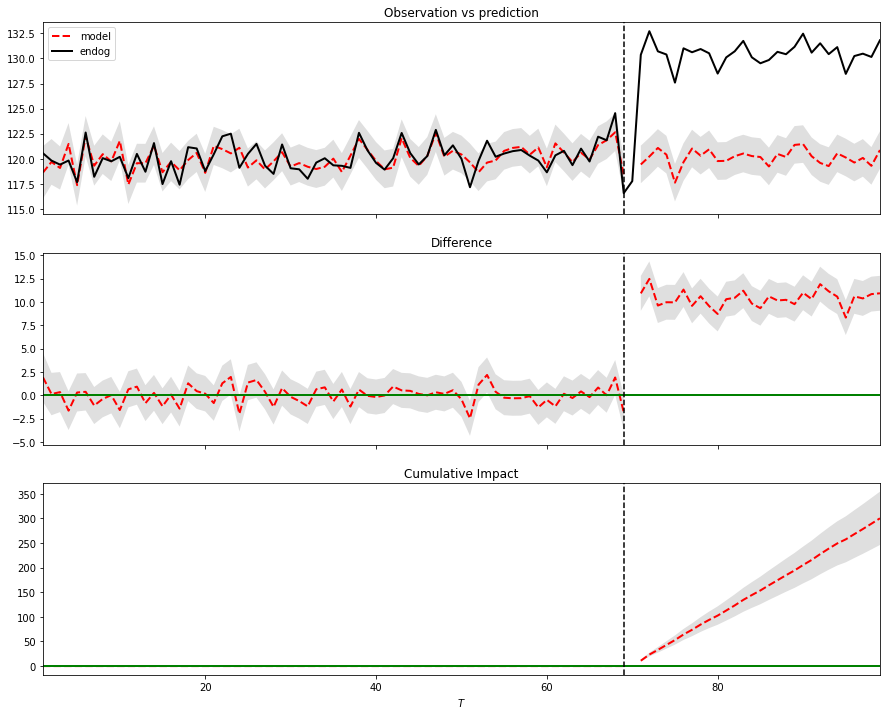

In [3]:
impact = CausalImpact(data, pre_period, post_period)
impact.run()
impact.plot()

The plot above gives us three sets of information. The top panel shows the actual data and a counterfactual prediction for the post-treatment period. 
The middle panel shows the difference between actual data and counterfactual predictions, which is the pointwise causal effect. 
The bottom panel is a plot of the cumulative effect of the intervention, where we accumulate the pointwise contributions from the middle panel.

If we want to gain information from each data point, we could use the following code.



In [4]:
impact.inferences

,response,cum_response,point_pred,point_pred_lower,point_pred_upper,cum_pred,cum_pred_lower,cum_pred_upper,point_effect,point_effect_lower,point_effect_upper,cum_effect,cum_effect_lower,cum_effect_upper
0,121.308920,121.308920,121.983426,-2774.849177,3018.816029,121.983426,-2774.849177,3018.816029,-0.674506,2896.158097,-2897.507109,0.000000,0.000000,0.000000
1,120.563149,241.872070,118.645161,116.021451,121.268872,240.628587,-2658.827726,3140.084901,1.917988,4.541699,-0.705722,0.000000,0.000000,0.000000
2,119.832495,361.704565,119.703725,117.431525,121.975926,360.332313,-2541.396201,3262.060827,0.128770,2.400970,-2.143431,0.000000,0.000000,0.000000
3,119.433612,481.138177,119.097659,116.955408,121.239910,479.429972,-2424.440793,3383.300736,0.335954,2.478205,-1.806297,0.000000,0.000000,0.000000
4,119.840664,600.978841,121.490741,119.416515,123.564966,600.920712,-2305.024278,3506.865703,-1.650077,0.424149,-3.724302,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,128.456173,11789.191224,120.140554,118.272105,122.009002,11413.153750,8337.414859,14488.892641,8.315619,10.184067,6.447170,257.597248,304.308461,210.886035
96,130.230586,11919.421810,119.638806,117.770358,121.507255,11532.792556,8455.185216,14610.399895,10.591779,12.460228,8.723331,268.189028,316.768689,219.609366
97,130.467414,12049.889223,120.100357,118.231909,121.968806,11652.892913,8573.417125,14732.368701,10.367057,12.235505,8.498608,278.556085,329.004195,228.107975
98,130.140680,12180.029904,119.309845,117.441397,121.178294,11772.202759,8690.858522,14853.546995,10.830835,12.699284,8.962387,289.386920,341.703478,237.070361


Also, a summary result is acquired via the following code.

In [6]:
impact.summary()

                              Average     Cumulative
Actual                            130           3784
Predicted                         120           3484
95% CI                     [118, 122]   [3430, 3538]
                                                    
Absolute Effect                    10            300
95% CI                        [12, 8]     [354, 246]
                                                    
Relative Effect                  8.6%           8.6%
95% CI                  [10.2%, 7.1%]  [10.2%, 7.1%]
                                                    
P-value                          0.0%               
Prob. of Causal Effect         100.0%               


The summary allowed us to assess if the intervention happening had a causal effect or not. If you want a more detailed report, you could use the following code.



In [7]:
impact.summary(output = 'report')

During the post-intervention period, the response             variable had an average value of             approx. 130.
By contrast, in  the absence of an intervention, we would have expected an average response of 120. The 95% interval of
this counterfactual prediction is [118, 122]. Subtracting this prediction from the observed response yields an estimate
of the causal effect the intervention had on the response variable. This effect is 10 with a 95% interval of [12, 8].
For a discussion of the significance of this effect, see below.


 Summing up the individual data points during the post-intervention period (which can only sometimes be meaningfully
interpreted), the response variable had an overall value of 3784.  By contrast, had  the intervention not taken place,
we would have expected a sum of 3484. The 95% interval of this prediction is [3430, 3538]


 The above results are given in terms of absolute numbers. In relative terms, the response variable showed  an increase
of  8.6%

4. DoWhy

DoWhy is a Python package that provides state-of-art causal analysis with a simple API and complete documentation.

 DoWhy did the causal analysis via 4-steps:

- Model a causal inference problem using assumptions we create,
- Identify an expression for the causal effect under the assumption,
- Estimate the expression using statistical methods,
- Verify the validity of the estimate.
Let’s try to initiate a short example of a causal analysis with the DoWhy package.



pip install dowhy

In [8]:
from dowhy import CausalModel
import dowhy.datasets
# Load some sample data
data = dowhy.datasets.linear_dataset(
    beta=10,
    num_common_causes=5,
    num_instruments=2,
    num_samples=10000,
    treatment_is_binary=True)

First, given a graph and assumption we create, we could develop it into the causal model.
Create a causal model from the data and given graph.


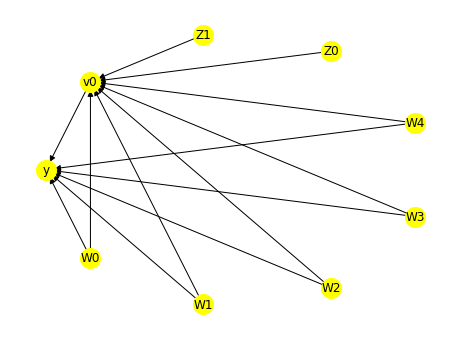

In [16]:

model = CausalModel(
    data=data["df"],
    treatment=data["treatment_name"],
    outcome=data["outcome_name"],
    graph=data["gml_graph"])
model.view_model()

In [17]:
#Identify the causal effect
estimands = model.identify_effect()
